In [1]:
#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer

#sklearn metrics
# from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

#model selection
from sklearn.linear_model import LinearRegression

In [2]:
#scaling initialization
scaler = StandardScaler()

In [3]:
#reading data from the drive
df = pd.read_csv("/content/drive/MyDrive/Datasets-20241201T040656Z-001/Datasets/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df["baseline value"].unique()

array([120., 132., 133., 134., 122., 151., 150., 131., 130., 129., 128.,
       124., 115., 114., 116., 158., 156., 148., 149., 146., 144., 142.,
       136., 141., 138., 140., 154., 145., 139., 125., 123., 159., 143.,
       119., 121., 127., 126., 118., 135., 137., 147., 157., 117., 152.,
       112., 106., 110., 160.])

In [5]:
df.columns = df.columns.str.strip()

In [6]:
numeric_df = df.select_dtypes(include=[np.number])

In [7]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

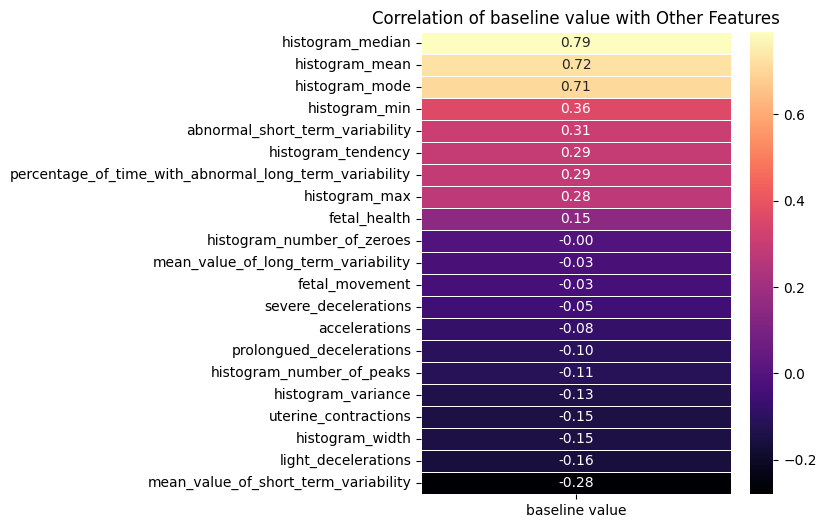

In [8]:
target = 'baseline value'
corr_values = df.corr(numeric_only=True)[target].drop(target)
corr_df = corr_values.to_frame().sort_values(by=target, ascending=False)

plt.figure(figsize=(5, 6))
sns.heatmap(corr_df, annot=True, cmap='magma', fmt=".2f", linewidths=0.5, cbar=True)

plt.title(f'Correlation of {target} with Other Features')
plt.show()

In [9]:
to_drop = ["histogram_number_of_zeroes", "mean_value_of_long_term_variability", "fetal_movement", "severe_decelerations", "accelerations"]
df = df.drop(to_drop, axis = 1)

In [10]:
df

,baseline value,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.0,73.0,0.5,43.0,64.0,62.0,126.0,2.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.003,0.0,17.0,2.1,0.0,130.0,68.0,198.0,6.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.008,0.003,0.0,16.0,2.1,0.0,130.0,68.0,198.0,5.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.008,0.003,0.0,16.0,2.4,0.0,117.0,53.0,170.0,11.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.008,0.000,0.0,16.0,2.4,0.0,117.0,53.0,170.0,9.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.007,0.000,0.0,79.0,0.2,25.0,40.0,137.0,177.0,4.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.007,0.000,0.0,78.0,0.4,22.0,66.0,103.0,169.0,6.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.007,0.000,0.0,79.0,0.4,20.0,67.0,103.0,170.0,5.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.006,0.000,0.0,78.0,0.4,27.0,66.0,103.0,169.0,6.0,152.0,147.0,151.0,4.0,1.0,2.0


In [11]:
X = numeric_df.drop("baseline value", axis=1)
X.values.reshape(-1, 1)
Y = numeric_df['baseline value']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 42)

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
def cost_function(X, Y, W):
    m = len(Y)
    Y_pred = np.dot(X, W)
    cost = np.sum((Y_pred - Y) ** 2) / (2 * m)
    return cost

In [15]:
def gradient_descent(X, Y, W, b, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        Y_pred = np.dot(X, W) + b
        loss = Y_pred - Y

        dw = np.dot(X.T, loss) / m
        db = np.sum(loss) / m

        W -= alpha * dw
        b -= alpha * db

        W = np.clip(W, -1e3, 1e3)
        b = np.clip(b, -1e3, 1e3)

        cost = cost_function(X, Y, W)
        cost_history[iteration] = cost
        #  # Debugging print to monitor W and b during iterations
        # if iteration % 1000 == 0:  # print every 100th iteration
        #     print(f"Iteration {iteration}: W = {W}, b = {b}, Cost = {cost}")

    return W, b, cost_history

In [16]:
def predict(X, W, b):
    return np.dot(X, W) + b

In [17]:
W = np.zeros(X_train.shape[1])
alpha = 0.01
iterations = 10000
b = 0

In [18]:
W, b, cost_history = gradient_descent(X_train, Y_train, W, b, alpha, iterations)

In [19]:
Y_pred = predict(X_test, W, b)

In [20]:
#calculating how much is my model's accuracy
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 12.716995646605685
R2 Score: 0.8609074796508693


In [21]:
alpha_values = [0.001, 0.01, 0.05, 0.1, 0.5]  # Learning rates
iteration_values = [1000, 2000, 3000, 4000, 5000, 6000]  # Number of iterations

In [22]:
# Variables to store the best model
best_alpha = None
best_iterations = None
best_mse = float('inf')  # Initialize with a high value
best_r2 = float('-inf')  # Initialize with a low value
best_W = None
best_b = None

In [23]:
for alpha in alpha_values:
    for iterations in iteration_values:
        # Initialize weights and bias
        W = np.zeros(X_train.shape[1])
        b = 0

        # Train the model
        W, b, cost_history = gradient_descent(X_train, Y_train, W, b, alpha, iterations)

        # Make predictions
        Y_pred = predict(X_test, W, b)

        # Calculate performance metrics
        mse = mean_squared_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)

        # Print progress
        print(f"Alpha: {alpha}, Iterations: {iterations}, MSE: {mse:.4f}, R2: {r2:.4f}")

        # Check if this is the best model
        if mse < best_mse:  # Lower MSE is better
            best_mse = mse
            best_r2 = r2
            best_alpha = alpha
            best_iterations = iterations
            best_W = W
            best_b = b

Alpha: 0.001, Iterations: 1000, MSE: 2448.0211, R2: -25.7753
Alpha: 0.001, Iterations: 2000, MSE: 352.1745, R2: -2.8519
Alpha: 0.001, Iterations: 3000, MSE: 63.5093, R2: 0.3054
Alpha: 0.001, Iterations: 4000, MSE: 22.3199, R2: 0.7559
Alpha: 0.001, Iterations: 5000, MSE: 15.8397, R2: 0.8268
Alpha: 0.001, Iterations: 6000, MSE: 14.5307, R2: 0.8411
Alpha: 0.01, Iterations: 1000, MSE: 13.6252, R2: 0.8510
Alpha: 0.01, Iterations: 2000, MSE: 13.0639, R2: 0.8571
Alpha: 0.01, Iterations: 3000, MSE: 12.8990, R2: 0.8589
Alpha: 0.01, Iterations: 4000, MSE: 12.8338, R2: 0.8596
Alpha: 0.01, Iterations: 5000, MSE: 12.7976, R2: 0.8600
Alpha: 0.01, Iterations: 6000, MSE: 12.7724, R2: 0.8603
Alpha: 0.05, Iterations: 1000, MSE: 12.7975, R2: 0.8600
Alpha: 0.05, Iterations: 2000, MSE: 12.7170, R2: 0.8609
Alpha: 0.05, Iterations: 3000, MSE: 12.6930, R2: 0.8612
Alpha: 0.05, Iterations: 4000, MSE: 12.6858, R2: 0.8612
Alpha: 0.05, Iterations: 5000, MSE: 12.6836, R2: 0.8613
Alpha: 0.05, Iterations: 6000, MSE: 

In [24]:
# Print best hyperparameters
print("\nBest Hyperparameters:")
print(f"Alpha: {best_alpha}, Iterations: {best_iterations}, Best MSE: {best_mse:.4f}, Best R2 Score: {best_r2:.4f}")

# Final model with best hyperparameters
Y_pred_best = predict(X_test, best_W, best_b)

# Evaluate again
mse_final = mean_squared_error(Y_test, Y_pred_best)
r2_final = r2_score(Y_test, Y_pred_best)

print(f"\nFinal Model Performance -> MSE: {mse_final:.4f}, R2 Score: {r2_final:.4f}")


Best Hyperparameters:
Alpha: 0.1, Iterations: 6000, Best MSE: 12.6826, Best R2 Score: 0.8613

Final Model Performance -> MSE: 12.6826, R2 Score: 0.8613


Knn regression

In [25]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [26]:
def find_neighbors(X_train, Y_train, x_test, K):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    # print(distances)
    sorted_indices = np.argsort(distances)
    return np.array(Y_train)[sorted_indices[:K]].flatten()

In [27]:
def knn_predict(X_train, Y_train, X_test, K):
    Y_pred = np.zeros(X_test.shape[0])
    for i, x in enumerate(X_test):
        neighbors = find_neighbors(X_train, Y_train, x, K)
        # print(neighbors)
        Y_pred[i] = np.mean(neighbors)
    return Y_pred

In [28]:
K = 2

In [29]:
Y_pred = knn_predict(X_train, Y_train, X_test, K)

In [30]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 14.105782792665726
R2 Score: 0.8457175786913981


In [31]:
# Define range of K values to test
k_values = range(1, 21)

best_k = None
best_mse = float('inf')
best_r2 = -float('inf')

# Store results
mse_list = []
r2_list = []

In [32]:
from sklearn.neighbors import KNeighborsRegressor

for k in k_values:
    # Initialize and train the model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)

    # Make predictions
    Y_pred = knn.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

    print(f"K: {k}, MSE: {mse:.4f}, R2: {r2:.4f}")

    # Track the best model
    if mse < best_mse:  # Lower MSE is better
        best_mse = mse
        best_r2 = r2
        best_k = k





K: 1, MSE: 15.6502, R2: 0.8288
K: 2, MSE: 14.1058, R2: 0.8457
K: 3, MSE: 14.9669, R2: 0.8363
K: 4, MSE: 15.0268, R2: 0.8356
K: 5, MSE: 15.2890, R2: 0.8328
K: 6, MSE: 16.1594, R2: 0.8233
K: 7, MSE: 16.2046, R2: 0.8228
K: 8, MSE: 16.2533, R2: 0.8222
K: 9, MSE: 16.5255, R2: 0.8193
K: 10, MSE: 16.5682, R2: 0.8188
K: 11, MSE: 16.6792, R2: 0.8176
K: 12, MSE: 17.0341, R2: 0.8137
K: 13, MSE: 17.4423, R2: 0.8092
K: 14, MSE: 17.6857, R2: 0.8066
K: 15, MSE: 17.9068, R2: 0.8041
K: 16, MSE: 18.2181, R2: 0.8007
K: 17, MSE: 18.3756, R2: 0.7990
K: 18, MSE: 18.6902, R2: 0.7956
K: 19, MSE: 18.7067, R2: 0.7954
K: 20, MSE: 18.8827, R2: 0.7935


In [33]:
# Print best K value
print("\nBest Hyperparameter:")
print(f"Optimal K: {best_k}, Best MSE: {best_mse:.4f}, Best R2 Score: {best_r2:.4f}")


Best Hyperparameter:
Optimal K: 2, Best MSE: 14.1058, Best R2 Score: 0.8457


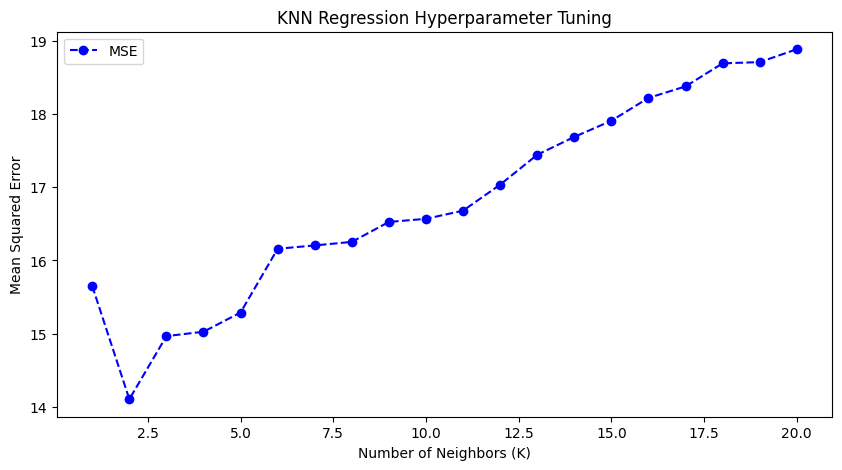

In [34]:
# Plot MSE vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, mse_list, marker='o', linestyle='dashed', color='b', label="MSE")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression Hyperparameter Tuning")
plt.legend()
plt.show()

In [35]:
W, b, cost_history = gradient_descent(X_train, Y_train, W, b, 0.1, 6000)

In [36]:
# Final model with best hyperparameters
Y_pred_best = predict(X_test, best_W, best_b)

# Evaluate again
mse_final = mean_squared_error(Y_test, Y_pred_best)
r2_final = r2_score(Y_test, Y_pred_best)

In [37]:
print(f"\nFinal Model Performance -> MSE: {mse_final:.4f}, R2 Score: {r2_final:.4f}")


Final Model Performance -> MSE: 12.6826, R2 Score: 0.8613
